<a href="https://colab.research.google.com/github/mizzony/ML-class/blob/main/230147_sutinan_IBM_employee_attrition_using_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IBM Employee attrition using Decision Trees and KNN


This portfolio explore IMB employee Attrition in IMB employee dataset. As IBM loses their employee it may resulting in cost in training new employee, recruting new employee. Other than that there are many reasons why some factors have correlated with the result of IBM Attrition such as Age, Gender, Job level, Experiences, Salary etc.

Here I m using the extensive of data exploratory, detect outliers, fix data imbalanced, reduce multicolinearlity, convert categorical value into numeric values using Categorical Encoding, Feature engineering to reduce redundancy and help with accuracy before train the model using KNN and Decision Tree.

Data Exploratory stage

In [23]:
#Loading data on my github
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # For interactive plotting with Plotly

# Handling warnings
import warnings

df = pd.read_csv('https://raw.githubusercontent.com/mizzony/ML-class/refs/heads/main/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head() #see Attrition columns has yes and no = categorical values

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [16]:
# Total number of employees
print(df.shape)

# Column names
print(df.columns)

# information of data (min, max, ,mean..std,)
pd.set_option('display.max_columns', None)
df.head()

# explore data summary transpose the matrix so its a lot easier to see
summary = df.describe().T
round(summary, 2)

(1470, 35)
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.92,9.14,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.49,403.51,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.19,8.11,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.91,1.02,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.00,0.00,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.87,602.02,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.72,1.09,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.89,20.33,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.73,0.71,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.06,1.11,1.0,1.00,2.0,3.00,5.0


In [17]:
#Explore missing values and drop it if any
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


**Preprocessing step : Data Cleaning and Reduction**

In [18]:
df.drop(columns = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)


In [20]:
df.shape #reduce from 35 colums to 31

(1470, 31)

#distribution of the predictor: employee attrition

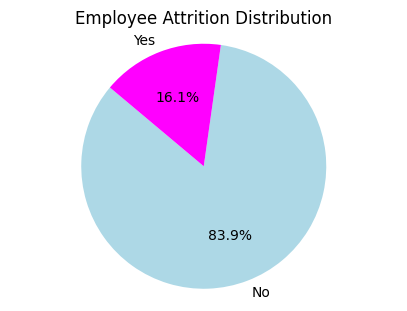

In [29]:

attrition_counts = df['Attrition'].value_counts()

plt.figure(figsize=(5, 3.5))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'magenta'])
plt.title('Employee Attrition Distribution')
plt.axis('equal')
plt.show() #yes in magenta means they left the company

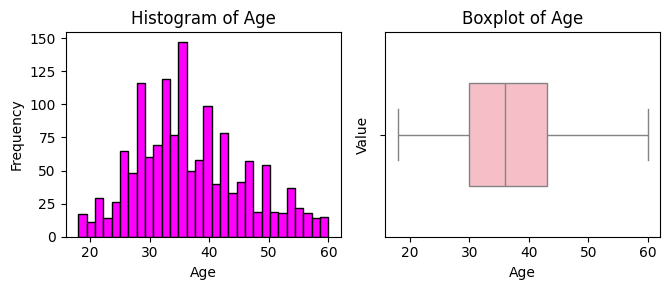

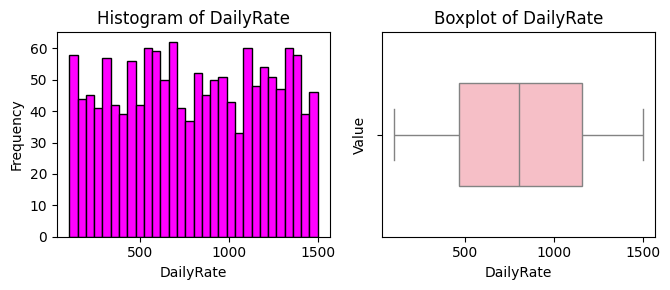

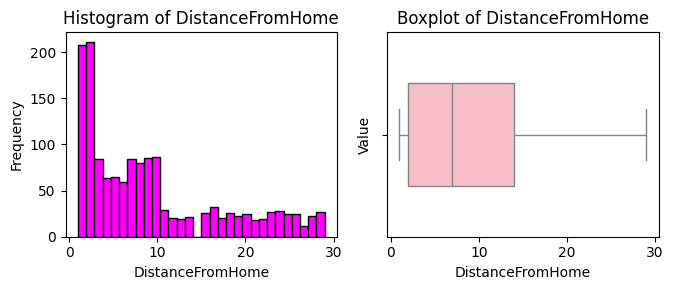

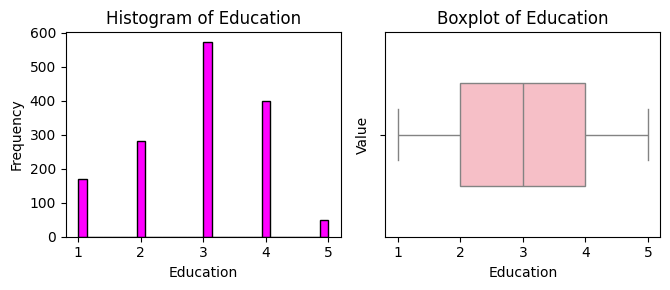

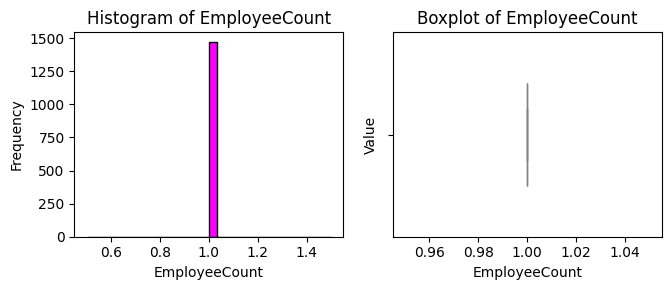

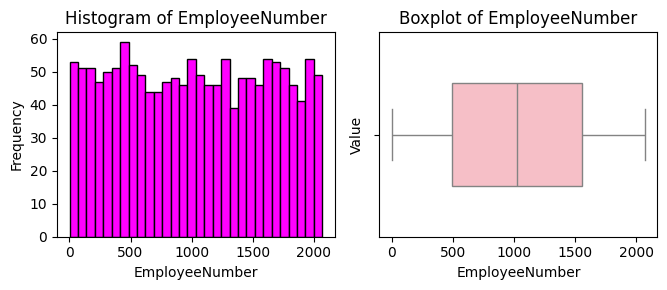

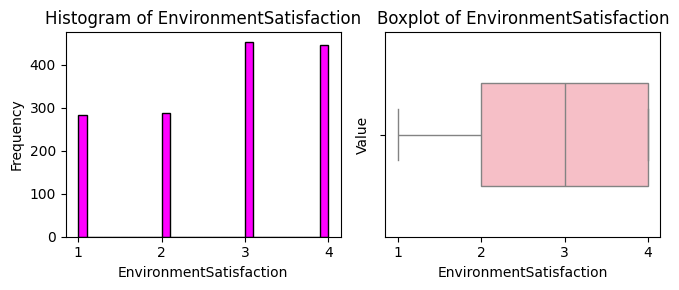

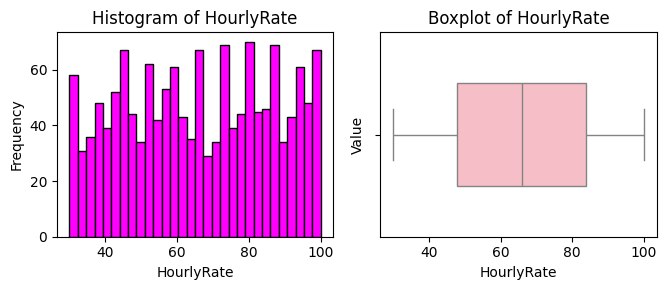

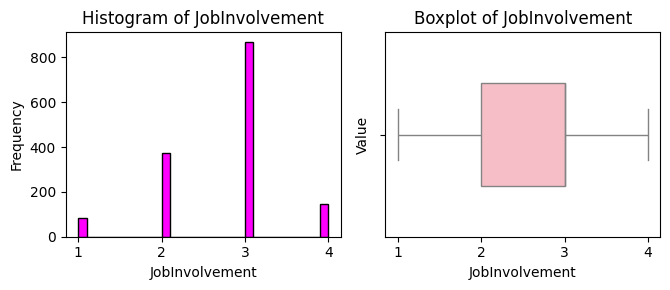

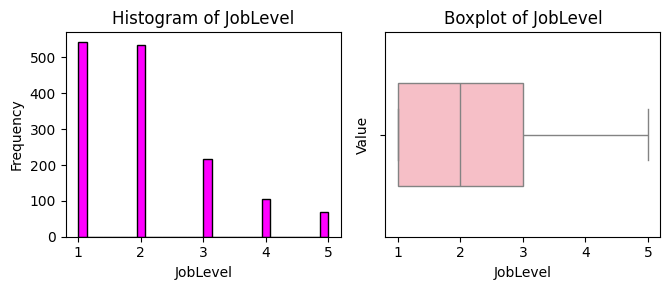

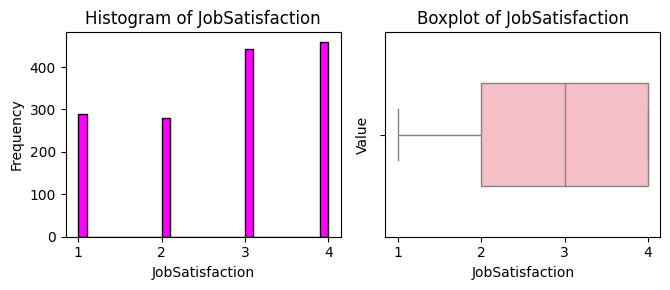

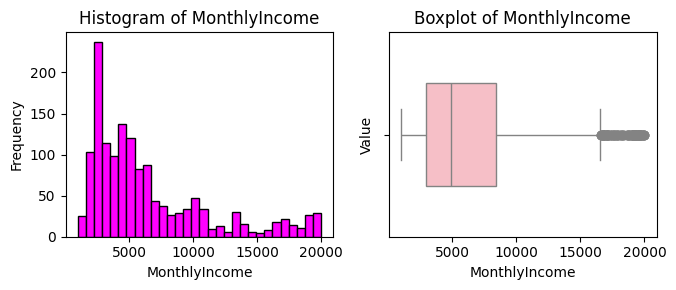

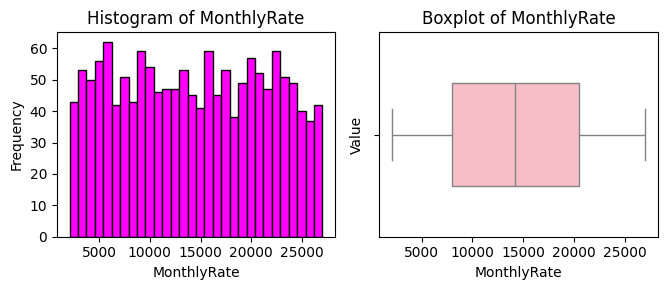

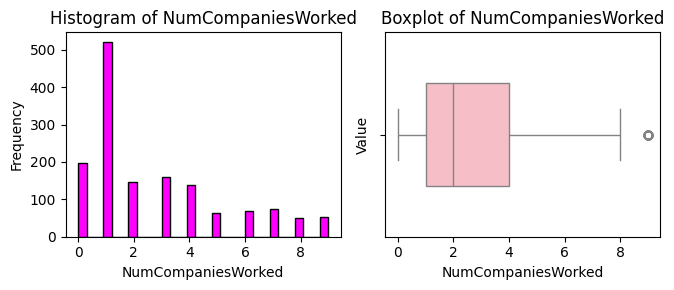

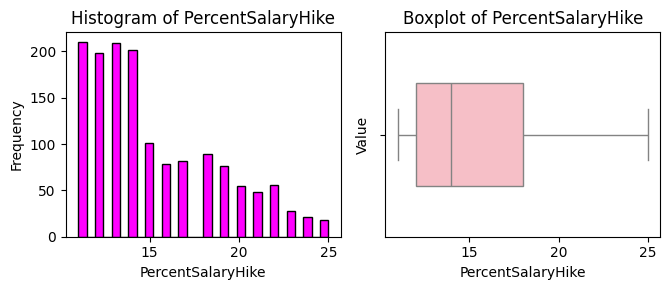

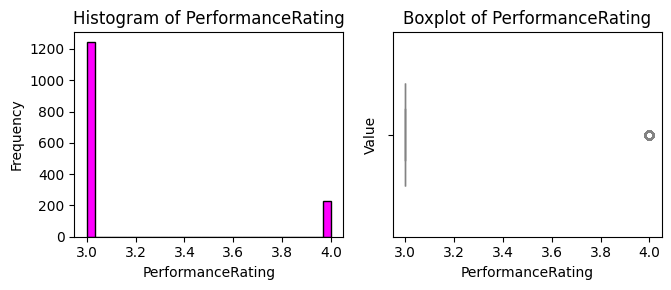

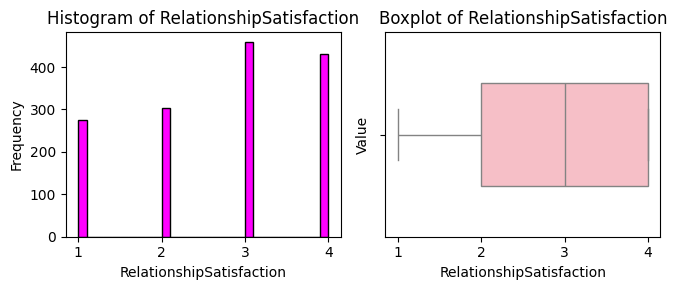

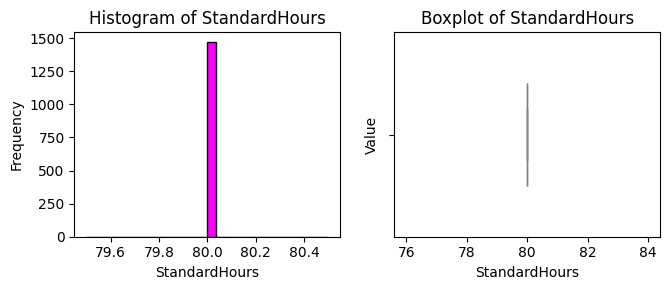

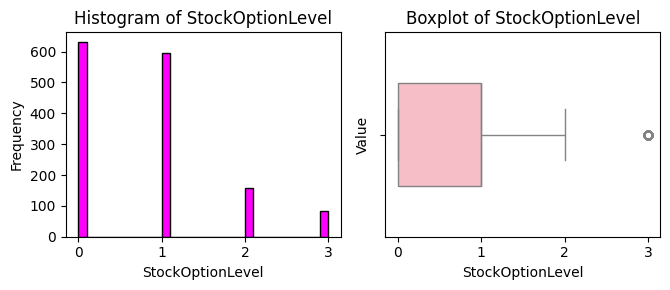

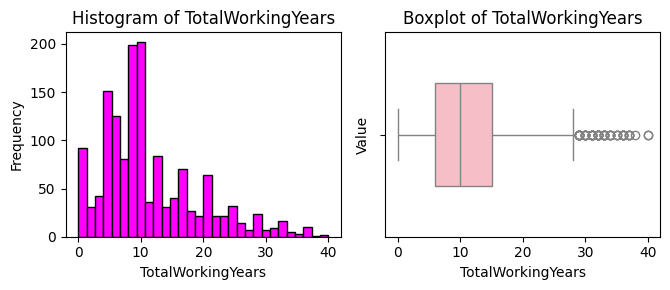

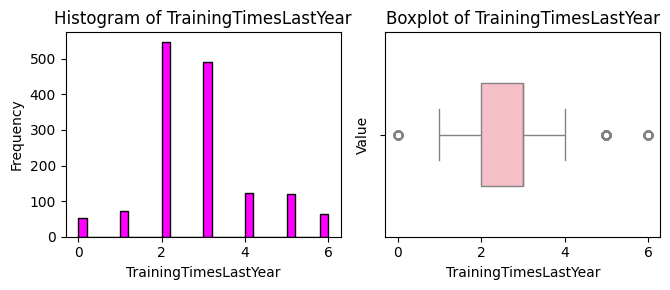

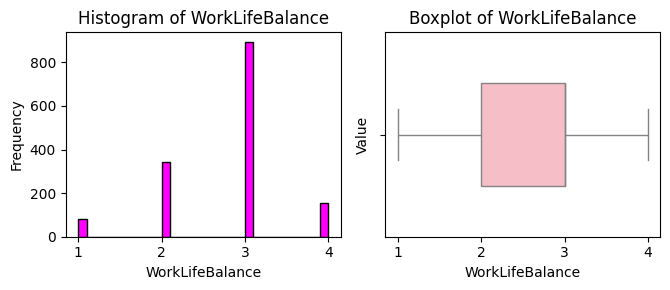

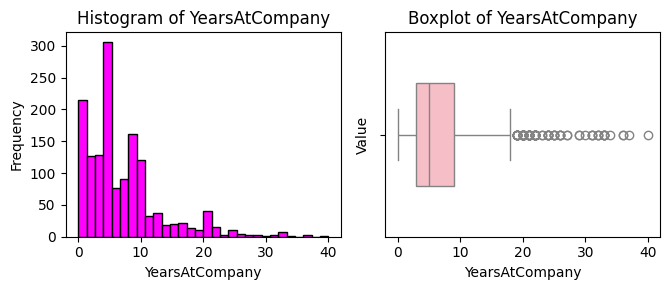

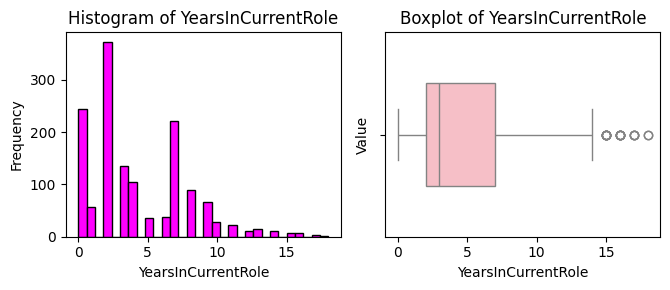

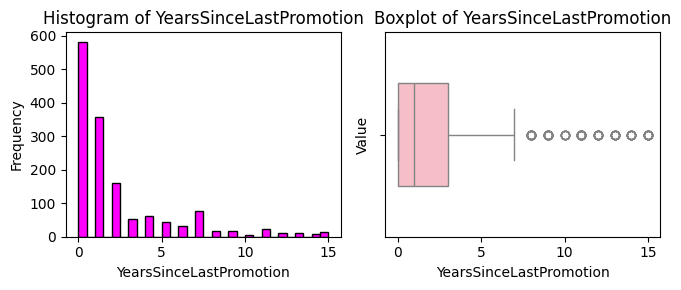

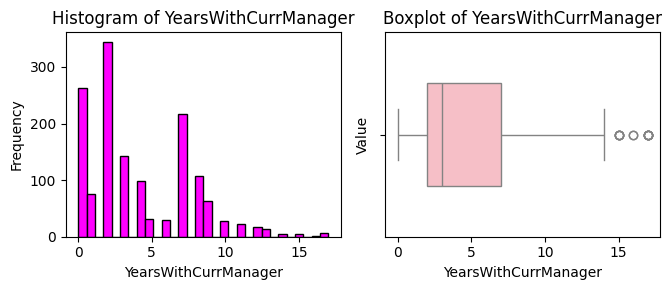

In [34]:
#Explore each columns : Univariate analysis
#Histogram for Visualize the distribution of column values, Boxplot for see percentiles and detect outliers
num_cols = df.select_dtypes(include=np.number).columns
numerical_data = df[num_cols]
for col in numerical_data[1:]:
    plt.figure(figsize=(10, 3))

    # Histogram
    plt.subplot(1, 3, 1)
    df[col].plot.hist(bins=30, color='magenta', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col],color='lightpink', width=0.5)
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {col}')


    plt.tight_layout()
    plt.show()


In [37]:
#explore relationship of age distribution and predictor
fig = px.histogram(df, x='Age', color='Attrition', barmode='group', nbins=20, title='Attrition by Age')
fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()

apparently younger age group(less than 40) has a lot higher Attrition compare to age > 40


In [38]:
#Gender and Attrition
fig = px.sunburst(df,path=['Gender','Attrition'], title='Gender Distribution')
fig.update_traces(textinfo='label+percent parent')
fig.update_layout(title_x=0.5)
fig.show()

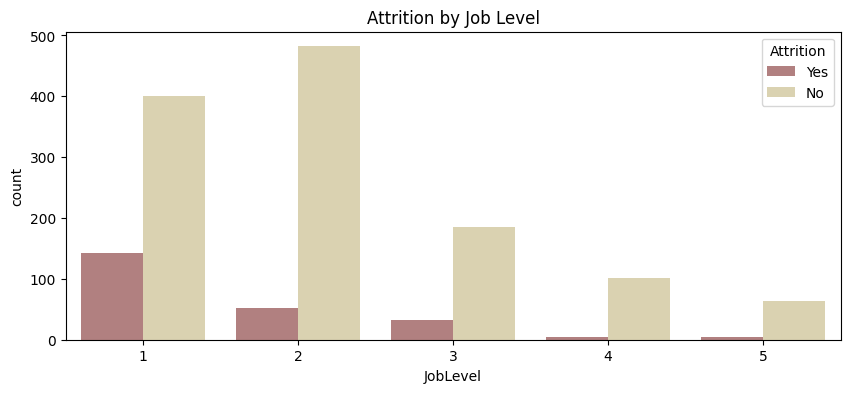

In [39]:
#Job level and Attrition
plt.figure(figsize=(10,4))
sns.countplot(x="JobLevel", hue="Attrition", data=df, palette='pink')
plt.title("Attrition by Job Level")
plt.show()

The lower job levels show higher attrition, this could potentially indicate that entry-level employees are more likely to leave.
Higher job levels might be associated with lower attrition rates due to better compensation and job satisfaction.

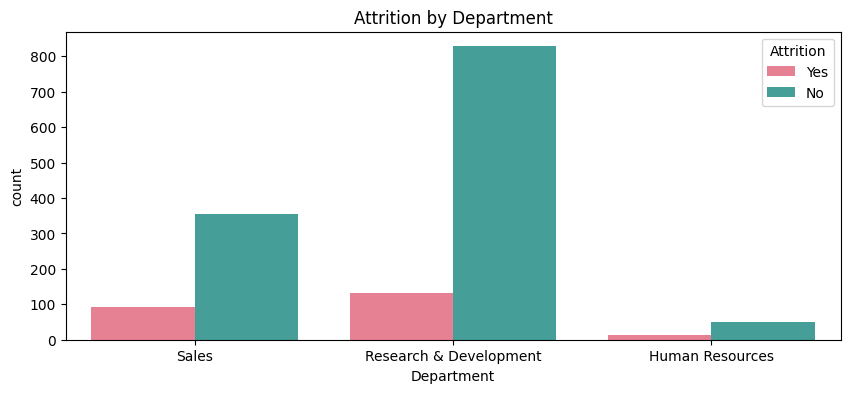

In [40]:
#Attrition by Departments
plt.figure(figsize=(10,4))
sns.countplot(x="Department", hue="Attrition", data=df, palette ='husl')
plt.title("Attrition by Department")
plt.show()

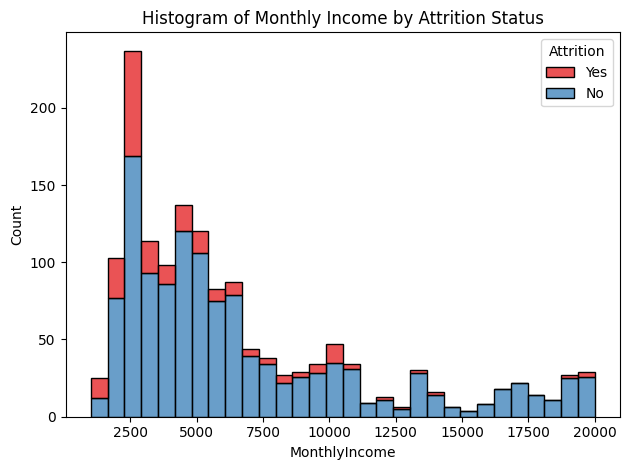

In [44]:
#monthly income and attrition
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', multiple='stack', bins=30, palette='Set1')
plt.title('Histogram of Monthly Income by Attrition Status')

plt.tight_layout()
plt.show()

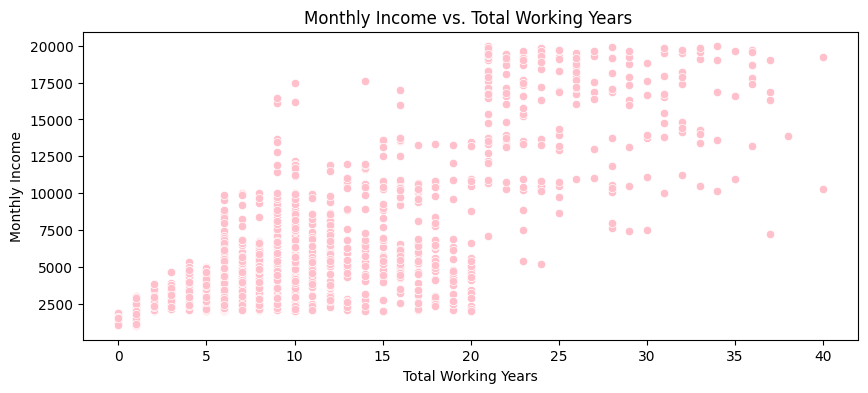

In [48]:
#Explore relationship of numerical values using Scatter plot
plt.figure(figsize=(10, 4))

# Monthly Income vs. Total Working Years
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', data=df, c='pink')#b= blue
plt.title('Monthly Income vs. Total Working Years ')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.show()

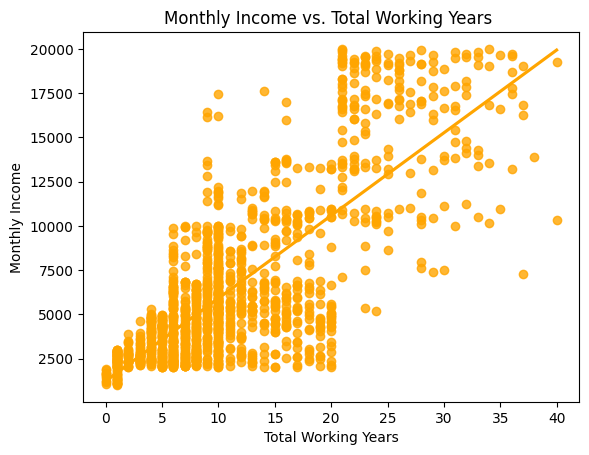

In [51]:
#adding a linear trend line to see trend
sns.regplot(x='TotalWorkingYears', y='MonthlyIncome', data=df, color='orange', ci= None)#b= blue
plt.title('Monthly Income vs. Total Working Years ')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.show()

                               Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014 

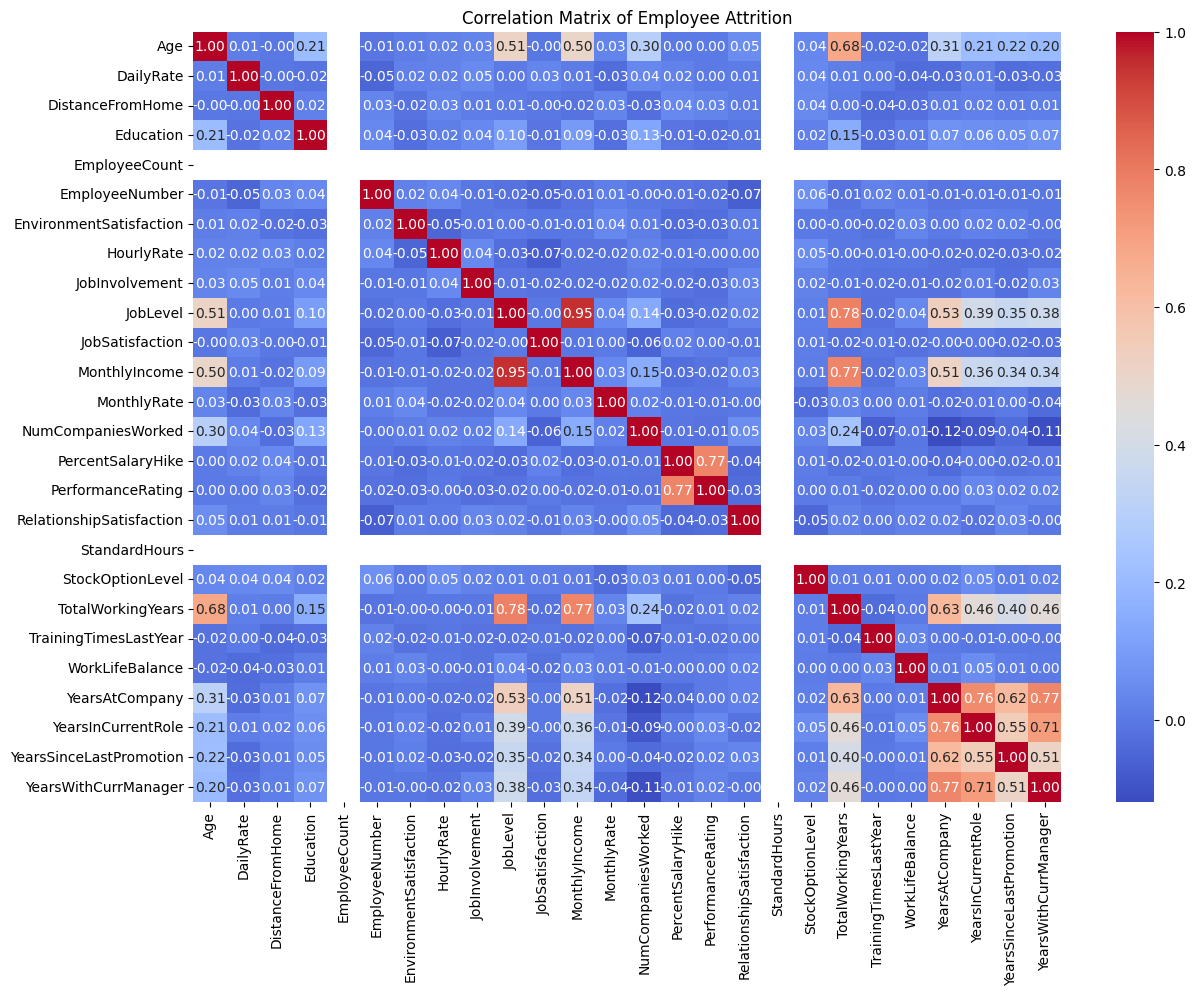

In [54]:
#Explore more variable using corelaton matrix
#This computes the correlation between all pairs of numerical columns
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Employee Attrition')
plt.show()

*Outliers ***
using percentiles, use method based on the Interquartile Range IQR(Q3-Q1) (The range within which the central 50% of the data lies) *1.5 times the IQR is a commonly used threshold for outliers

In [55]:
features_with_outliers = []
for feature in num_cols:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    iqr = Q3 - Q1
    upper_limit = Q3 + 1.5 * iqr
    lower_limit = Q1 - 1.5 * iqr
    outliers = df[(df[feature] > upper_limit) | (df[feature] < lower_limit)]
    proportion_of_outliers = len(outliers) / len(df) * 100
    if len(outliers) > 0:
        features_with_outliers.append(feature)
        print(f"Feature: {feature}")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Proportion of outliers: {proportion_of_outliers:.2f}%\n")


Feature: MonthlyIncome
Number of outliers: 114
Proportion of outliers: 7.76%

Feature: NumCompaniesWorked
Number of outliers: 52
Proportion of outliers: 3.54%

Feature: PerformanceRating
Number of outliers: 226
Proportion of outliers: 15.37%

Feature: StockOptionLevel
Number of outliers: 85
Proportion of outliers: 5.78%

Feature: TotalWorkingYears
Number of outliers: 63
Proportion of outliers: 4.29%

Feature: TrainingTimesLastYear
Number of outliers: 238
Proportion of outliers: 16.19%

Feature: YearsAtCompany
Number of outliers: 104
Proportion of outliers: 7.07%

Feature: YearsInCurrentRole
Number of outliers: 21
Proportion of outliers: 1.43%

Feature: YearsSinceLastPromotion
Number of outliers: 107
Proportion of outliers: 7.28%

Feature: YearsWithCurrManager
Number of outliers: 14
Proportion of outliers: 0.95%



Feature engineering : to group some features that are in the same group and some of which show positive correlation as you can see the the correlation matrix above


In [59]:
df['WorkExperience'] = df[['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
                                'YearsSinceLastPromotion', 'YearsWithCurrManager']].mean(axis=1)
df['OverallSatisfaction'] = (
    df[['JobSatisfaction' , 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']].mean(axis=1)
)

0    4.6
1    7.0
2    1.4
3    5.2
4    2.8
Name: WorkExperience, dtype: float64


In [60]:
#Multicollinearity : drop some columns Multicollinearity because
# These columns have high correlation with other features
df=df.drop(['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
            'YearsSinceLastPromotion', 'JobSatisfaction' , 'EnvironmentSatisfaction',
            'RelationshipSatisfaction', 'WorkLifeBalance'],axis=1)

In [62]:
#import some packages for pre and processing data
# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# For preprocessing the data: Label Encoding and Standard Scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler


# For building models
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier   # K-Nearest Neighbors model

# For evaluating models
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Additional Plotly imports for advanced plotting and graph creation
import plotly.express as px  # Repeated import of Plotly for consistency
import plotly.graph_objects as go  # For creating detailed graphs
import math
from plotly.subplots import make_subplots  # For creating subplots in Plotly
from numpy import linalg as LA  # Linear algebra functions for advanced computations

# Feature selection
from sklearn.feature_selection import RFE  # Recursive Feature Elimination for feature selection

# Data splitting again (re-import, same as above)
from sklearn.model_selection import train_test_split

# For resampling and dealing with imbalanced datasets
from sklearn.utils import resample

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import graphviz

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Categorical Encoding :because Decision Trees Work with Numerical Data example (0,1,2,3) not female, male, etc

In [63]:
cat_cols = df.select_dtypes(include = ['object'])
# Create a LabelEncoder object
label_encoder = LabelEncoder()
categorical_cols = cat_cols
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,StandardHours,StockOptionLevel,TrainingTimesLastYear,YearsWithCurrManager,WorkExperience,OverallSatisfaction
0,41,1,2,1102,2,1,2,1,1,1,0,94,3,2,7,2,5993,19479,8,0,1,11,3,80,0,0,5,4.6,2.00
1,49,0,1,279,1,8,1,1,1,2,1,61,2,2,6,1,5130,24907,1,0,0,23,4,80,1,3,7,7.0,3.00
2,37,1,2,1373,1,2,2,4,1,4,1,92,2,1,2,2,2090,2396,6,0,1,15,3,80,0,3,0,1.4,3.00
3,33,0,1,1392,1,3,4,1,1,5,0,56,3,1,6,1,2909,23159,1,0,1,11,3,80,0,3,0,5.2,3.25
4,27,0,2,591,1,2,1,3,1,7,1,40,3,1,2,1,3468,16632,9,0,0,12,3,80,1,3,2,2.8,2.50


In [65]:
#split the data then train and test the model
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)  # Selecting all columns except the target
y = df['Attrition']                # Selecting the target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

#Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train shape: (1176, 28)
X_test shape: (294, 28)
y_train shape: (1176,)
y_test shape: (294,)


In [66]:
#fix imbalance data problems because it may leads to inaccuracy or errors
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
print("Before Smoote" , y_train.value_counts())

X_train, y_train = smote.fit_resample(X_train, y_train)

print("\n After Smoote" , y_train.value_counts())

Before Smoote Attrition
0    986
1    190
Name: count, dtype: int64

 After Smoote Attrition
0    986
1    986
Name: count, dtype: int64


Modeling : Decision Tree

In [72]:
model = DecisionTreeClassifier(max_depth=10, random_state=42) #so 10 depth is better than 5

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)

# Make predictions on the test data

y_test_predict = model.predict(X_test)

In [73]:
# Classification Report for Train Set
print("=================================================================================================")
print("Classification Report for DecisionTreeClassifier Model (Train Set):")
print(classification_report(y_train, y_train_predict))

# Classification Report for Test Set
print("=================================================================================================")
print("Classification Report for DecisionTreeClassifier Model (Test Set):")
print(classification_report(y_test, y_test_predict))

Classification Report for DecisionTreeClassifier Model (Train Set):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       986
           1       0.98      0.99      0.98       986

    accuracy                           0.98      1972
   macro avg       0.98      0.98      0.98      1972
weighted avg       0.98      0.98      0.98      1972

Classification Report for DecisionTreeClassifier Model (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       247
           1       0.32      0.38      0.35        47

    accuracy                           0.77       294
   macro avg       0.60      0.61      0.60       294
weighted avg       0.79      0.77      0.78       294



|--- JobLevel <= -0.07
|   |--- OverTime <= -0.63
|   |   |--- YearsWithCurrManager <= -0.62
|   |   |   |--- OverallSatisfaction <= 0.98
|   |   |   |   |--- Education <= -1.81
|   |   |   |   |   |--- Age <= -1.69
|   |   |   |   |   |   |--- MonthlyIncome <= -1.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- MonthlyIncome >  -1.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  -1.69
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Education >  -1.81
|   |   |   |   |   |--- StockOptionLevel <= 1.19
|   |   |   |   |   |   |--- Age <= -0.13
|   |   |   |   |   |   |   |--- DistanceFromHome <= -1.02
|   |   |   |   |   |   |   |   |--- HourlyRate <= -0.25
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- HourlyRate >  -0.25
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- DistanceFromHome >  -1.02
|   |   |   |   |   |   |   |   |--- MonthlyRate <= -1.4

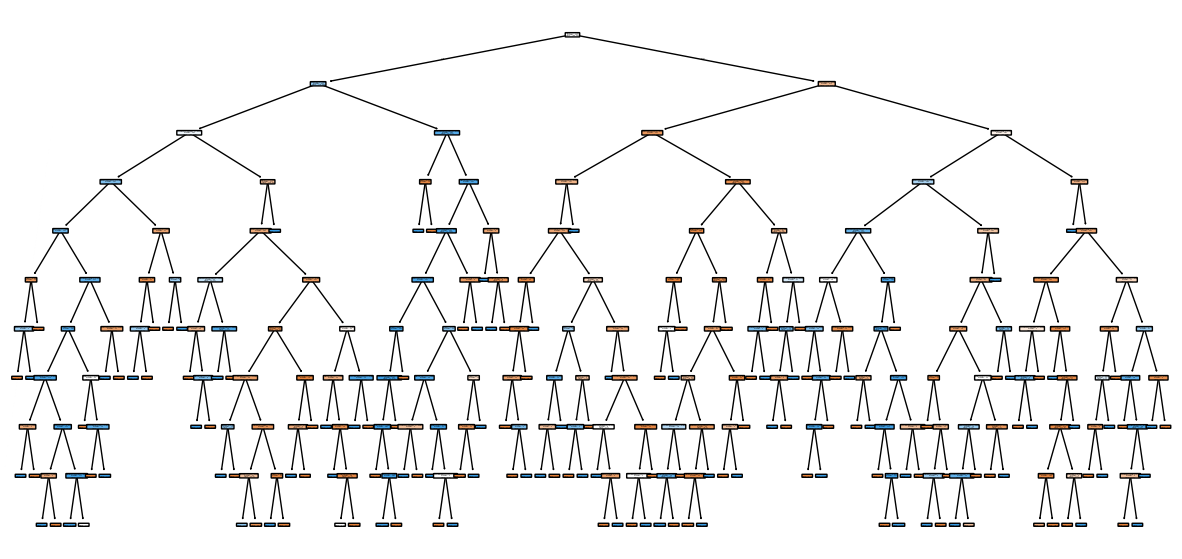

In [78]:
#visualize the Tree but not recommend on this on ecause there are not easy to read sinc there's too many nodes
from sklearn.tree import plot_tree, export_text

features = X.columns

plt.figure(figsize=(15, 7))
plot_tree(model, filled=True,
          rounded=True,
          impurity=False,
          feature_names=features.tolist()) # Convert features to a list

print(export_text(model, feature_names=features.tolist())) # Convert features to a list

<Axes: >

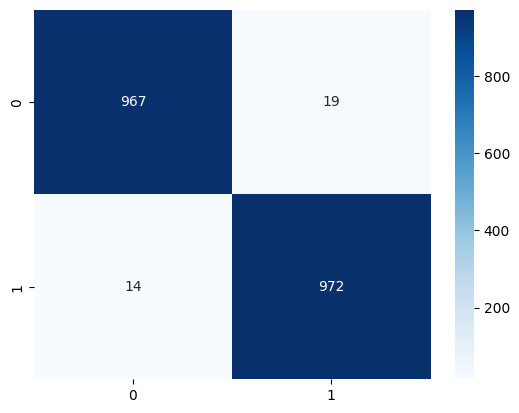

In [79]:
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

KNN

In [69]:
# Create a K-Nearest Neighbors model (with 10 neighbors)
model = KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto',
                             leaf_size=50, p=2, metric='minkowski', metric_params=None, n_jobs=None)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training data
y_train_predict = model.predict(X_train)

# Make predictions on the test data
y_test_predict = model.predict(X_test)

In [70]:
# Classification Report for Train Set
print("=================================================================================================")
print("Classification Report for KNN Model (Train Set):")
print(classification_report(y_train, y_train_predict))

# Classification Report for Test Set
print("=================================================================================================")
print("Classification Report for KNN Model (Test Set):")
print(classification_report(y_test, y_test_predict))

Classification Report for KNN Model (Train Set):
              precision    recall  f1-score   support

           0       0.97      0.66      0.79       986
           1       0.74      0.98      0.84       986

    accuracy                           0.82      1972
   macro avg       0.86      0.82      0.82      1972
weighted avg       0.86      0.82      0.82      1972

Classification Report for KNN Model (Test Set):
              precision    recall  f1-score   support

           0       0.90      0.61      0.73       247
           1       0.24      0.66      0.36        47

    accuracy                           0.62       294
   macro avg       0.57      0.64      0.54       294
weighted avg       0.80      0.62      0.67       294



<Axes: >

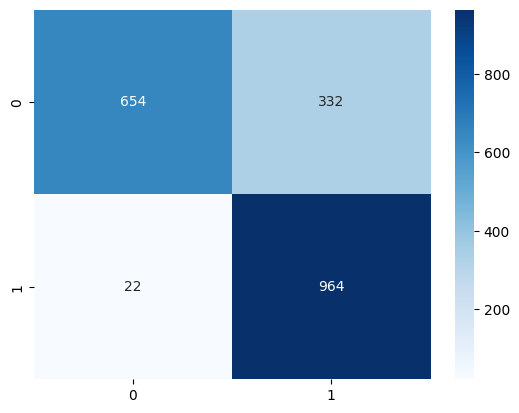

In [71]:
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

summary

In this portfolio,
- StandardScaler has been applied to normalize the features, ensuring consistency and improving model performance.
- for Imbalanced dataset using SMOTE (Synthetic Minority Over-sampling Technique), which helped to generate synthetic samples for the minority class, providing a more balanced dataset for training.

2 classifier model has been trained which are KNN and Decision Tree to to predict employee attrition and it shown that decision treee has 98% accuracy compare to KNN which is 82%

suggestion
Can use multiple classifier model in the future such as Random forest, Gradiantboost, etc.


